In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('Downloads/US_Crime_Rates_1960_2014.csv')
df.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [17]:
df.shape

(55, 12)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,55.0,1.987000e+03,1.602082e+01,1960.0,1973.5,1987.0,2000.5,2014.0
Population,55.0,2.461556e+08,4.166216e+07,179323175.0,210621500.0,242282918.0,283369732.5,318857056.0
Total,55.0,1.060315e+07,3.175931e+06,3384200.0,9096958.0,11401511.0,13084485.5,14872900.0
Violent,55.0,1.188806e+06,4.597107e+05,288460.0,925315.0,1322390.0,1432762.0,1932270.0
Property,55.0,9.412499e+06,2.738512e+06,3095700.0,8060014.5,10182586.0,11605087.5,12961100.0
Murder,55.0,1.731724e+04,4.267443e+03,8530.0,14819.0,17030.0,20561.5,24700.0
Forcible_Rape,55.0,7.271480e+04,2.827801e+04,17190.0,53400.0,84230.0,92930.0,109060.0
Robbery,55.0,4.164499e+05,1.505064e+05,106670.0,354911.5,423557.0,512137.0,687730.0
Aggravated_assault,55.0,6.811818e+05,2.960255e+05,154320.0,438430.0,741291.0,900215.0,1135610.0
Burglary,55.0,2.424017e+06,7.259004e+05,912100.0,2105335.5,2329950.0,3073600.0,3795200.0


In [19]:
df.isnull().sum()

Year                  0
Population            0
Total                 0
Violent               0
Property              0
Murder                0
Forcible_Rape         0
Robbery               0
Aggravated_assault    0
Burglary              0
Larceny_Theft         0
Vehicle_Theft         0
dtype: int64

In [20]:
df.columns

Index(['Year', 'Population', 'Total', 'Violent', 'Property', 'Murder',
       'Forcible_Rape', 'Robbery', 'Aggravated_assault', 'Burglary',
       'Larceny_Theft', 'Vehicle_Theft'],
      dtype='object')

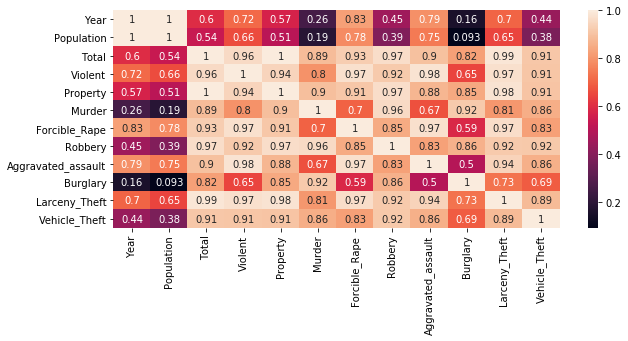

In [21]:
plt.figure(figsize=(10,4)) 
sns.heatmap(df.corr(), annot=True)

In [22]:
#standardize the data to normal distribution
from sklearn import preprocessing
df_standardized = preprocessing.scale(df)
print(df_standardized)
df_standardized = pd.DataFrame(df_standardized)

[[-1.70084013 -1.61893631 -2.29396741 -1.97655586 -2.32791358 -1.94094715
  -1.98163047 -2.06937561 -1.79618905 -2.10201344 -2.24348726 -2.04552034]
 [-1.63784605 -1.53006335 -2.26098285 -1.9745142  -2.28999211 -2.02844926
  -1.9805598  -2.07722102 -1.78787054 -2.04987732 -2.21200392 -2.02274085]
 [-1.57485197 -1.46274535 -2.1770279  -1.9479068  -2.19708634 -2.07811261
  -1.96878239 -2.04912508 -1.76124452 -1.98773107 -2.11547687 -1.9327911 ]
 [-1.51185789 -1.39705035 -2.06348854 -1.913967   -2.07112366 -2.05209848
  -1.96521348 -2.01150737 -1.72837961 -1.85968476 -2.00167771 -1.81159256]
 [-1.44886381 -1.33266344 -1.91887122 -1.81023765 -1.92080132 -1.88182411
  -1.83066555 -1.91816717 -1.63005764 -1.68339516 -1.88328723 -1.62322374]
 [-1.38586973 -1.27488963 -1.86332495 -1.75937185 -1.86493256 -1.73992881
  -1.75964423 -1.86251174 -1.58819239 -1.58704761 -1.85147594 -1.55284098]
 [-1.32287566 -1.2252308  -1.7094923  -1.66543367 -1.7023014  -1.48451726
  -1.67363349 -1.73309609 -1.520

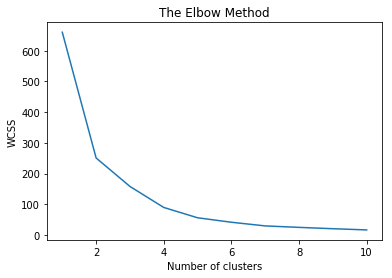

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 4))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_standardized)

y_kmeans

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

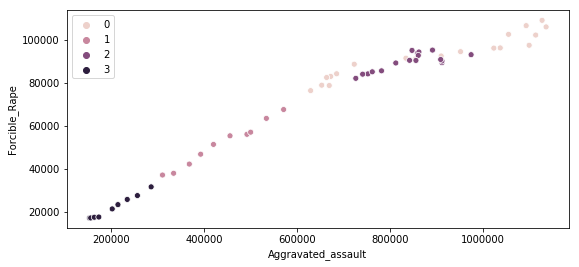

In [42]:
import seaborn as sns

plt.figure(figsize=(9,4))
sns.scatterplot(x=df['Aggravated_assault'], y = df['Forcible_Rape'],hue=y_kmeans)

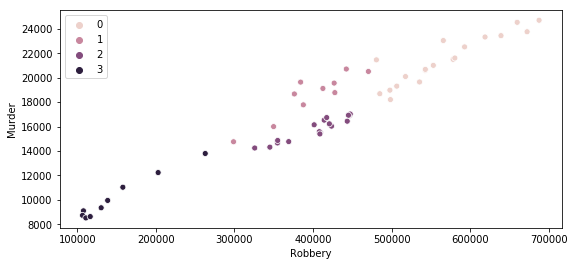

In [43]:
plt.figure(figsize=(9,4))
sns.scatterplot(x=df['Robbery'], y = df['Murder'],hue=y_kmeans)

In [45]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
df['cluster'] = cluster

In [46]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
cluster,,,,,,,,,,,,
1,1988.0,245331974.4,13465526.5,1571174.6,11894261.8,21427.7,92544.3,566144.4,891127.9,3090553.7,7473221.7,1330515.8
2,1973.5,210247929.8,9615300.0,906177.0,8709130.0,18553.0,51535.0,397717.0,438373.0,2714020.0,5044540.0,950560.0
3,2006.0,297711896.3,11134707.2,1352774.2,9776073.1,15786.5,89768.9,402127.7,841318.1,2124766.8,6629493.8,1022043.7
4,1964.0,190407575.0,4653888.9,385895.6,4267988.9,10157.8,22172.2,148295.6,205270.0,1259911.1,2517677.8,490400.0


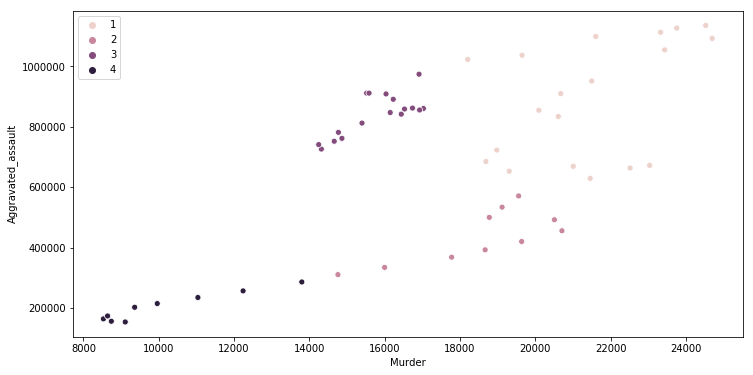

In [47]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Murder'], y = df['Aggravated_assault'],hue=y_kmeans1)

In [48]:
df[df['cluster']==1]

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,cluster
19,1979,220099000,12249500,1208030,11041500,21460,76390,480700,629480,3327700,6601000,1112800,1
20,1980,225349264,13408300,1344520,12063700,23040,82990,565840,672650,3795200,7136900,1131700,1
21,1981,229146000,13423800,1361820,12061900,22520,82500,592910,663900,3779700,7194400,1087800,1
22,1982,231534000,12974400,1322390,11652000,21010,78770,553130,669480,3447100,7142500,1062400,1
23,1983,233981000,12108600,1258090,10850500,19310,78920,506570,653290,3129900,6712800,1007900,1
24,1984,236158000,11881800,1273280,10608500,18690,84230,485010,685350,2984400,6591900,1032200,1
25,1985,238740000,12431400,1328800,11102600,18980,88670,497870,723250,3073300,6926400,1102900,1
26,1986,240132887,13211869,1489169,11722700,20613,91459,542775,834322,3241410,7257153,1224137,1
27,1987,242282918,13508700,1483999,12024700,20096,91110,517704,855088,3236184,7499900,1288674,1
28,1988,245807000,13923100,1566220,12356900,20680,92490,542970,910090,3218100,7705900,1432900,1


In [49]:
df[df['cluster']==2]

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,cluster
9,1969,201385000,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500,2
10,1970,203235298,8098000,738820,7359200,16000,37990,349860,334970,2205000,4225800,928400,2
11,1971,206212000,8588200,816500,7771700,17780,42260,387700,368760,2399300,4424200,948200,2
12,1972,208230000,8248800,834900,7413900,18670,46850,376290,393090,2375500,4151200,887200,2
13,1973,209851000,8718100,875910,7842200,19640,51400,384220,420650,2565500,4347900,928800,2
14,1974,211392000,10253400,974720,9278700,20710,55400,442400,456210,3039200,5262500,977100,2
15,1975,213124000,11292400,1039710,10252700,20510,56090,470500,492620,3265300,5977700,1009600,2
16,1976,214659000,11349700,1004210,10345500,18780,57080,427810,500530,3108700,6270800,966000,2
17,1977,216332000,10984500,1029580,9955000,19120,63500,412610,534350,3071500,5905700,977700,2
18,1978,218059000,11209000,1085550,10123400,19560,67610,426930,571460,3128300,5991000,1004100,2


In [50]:
df[df['cluster']==3]

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,cluster
38,1998,270296000,12475634,1531044,10944590,16914,93103,446625,974402,2329950,7373886,1240754,3
39,1999,272690813,11634378,1426044,10208334,15522,89411,409371,911740,2100739,6955520,1152075,3
40,2000,281421906,11608072,1425486,10182586,15586,90178,408016,911706,2050992,6971590,1160002,3
41,2001,285317559,11876669,1439480,10437480,16037,90863,423557,909023,2116531,7092267,1228391,3
42,2002,287973924,11878954,1423677,10455277,16229,95235,420806,891407,2151252,7057370,1246646,3
43,2003,290690788,11826538,1383676,10442862,16528,93883,414235,859030,2154834,7026802,1261226,3
44,2004,293656842,11679474,1360088,10319386,16148,95089,401470,847381,2144446,6937089,1237851,3
45,2005,296507061,11565499,1390745,10174754,16740,94347,417438,862220,2155448,6783447,1235859,3
46,2006,299398484,11401511,1418043,9983568,17030,92757,447403,860853,2183746,6607013,1192809,3
47,2007,301621157,11251828,1408337,9843481,16929,90427,445125,855856,2176140,6568572,1095769,3


In [51]:
df[df['cluster']==4]

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,cluster
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200,4
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000,4
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800,4
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300,4
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800,4
5,1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900,4
6,1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200,4
7,1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800,4
8,1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600,4


In [57]:
centroids

array([[1.96800000e+03, 1.99541471e+08, 6.66908571e+06, 5.89957143e+05,
        6.07912857e+06, 1.36542857e+04, 3.22771429e+04, 2.56977143e+05,
        2.87048571e+05, 1.82425714e+06, 3.50392857e+06, 7.50942857e+05,
        3.14285714e+00],
       [2.00200000e+03, 2.87812204e+08, 1.17739414e+07, 1.40648140e+06,
        1.03675182e+07, 1.61056000e+04, 9.30496000e+04, 4.13616800e+05,
        8.83709400e+05, 2.12361100e+06, 7.01702360e+06, 1.22682320e+06,
        3.00000000e+00],
       [1.99000000e+03, 2.50002975e+08, 1.43922400e+07, 1.77528600e+06,
        1.26169600e+07, 2.28160000e+04, 1.01040000e+05, 6.24156000e+05,
        1.02727400e+06, 3.11946000e+06, 7.91628000e+06, 1.58122000e+06,
        1.00000000e+00],
       [2.01200000e+03, 3.14029261e+08, 1.00335934e+07, 1.21440340e+06,
        8.81919000e+06, 1.45734000e+04, 8.42118000e+04, 3.49961800e+05,
        7.52828400e+05, 2.02503400e+06, 6.08033960e+06, 7.13816000e+05,
        3.00000000e+00],
       [1.97500000e+03, 2.13092429e+

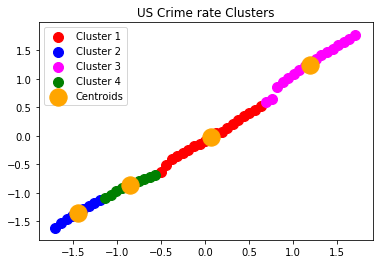

In [73]:
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.scatter(df[y_kmeans == 3, 0], df[y_kmeans == 3, 1], s = 100, c = 'green', label = 'Cluster 4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'Orange', label = 'Centroids')
plt.title('US Crime rate Clusters')
plt.legend()
plt.show()
